## IMPORT REQUIRED LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD DATA

In [4]:
df= pd.read_csv("./data/clean_titanic.csv")

In [5]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


## ANALYZE AND VISUALIZE 'pclass' COLUMN

In [7]:
pclass=df['pclass'].value_counts()
pclass

pclass
3    709
1    323
2    277
Name: count, dtype: int64

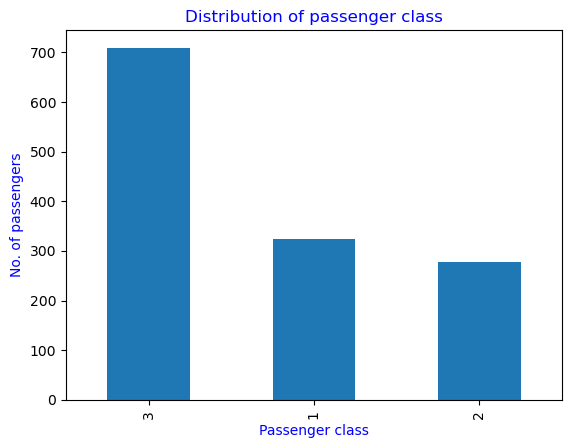

In [8]:
pclass.plot(kind="bar")
plt.xlabel("Passenger class",color="b")
plt.ylabel("No. of passengers",color="b")
plt.title("Distribution of passenger class",color="blue");

 - Passenger class 3 had **54.16%** passengers followed by 1 with **24.67%** then 2 with **21.16%**

**Question**
- Out of 1309, how many passengers survived? how many passengers from each passenger class survived?

## ANALYZE AND VISUALIZE 'survived' BY 'pclass'

In [11]:
survived=df['survived'].value_counts()
survived

survived
0    809
1    500
Name: count, dtype: int64

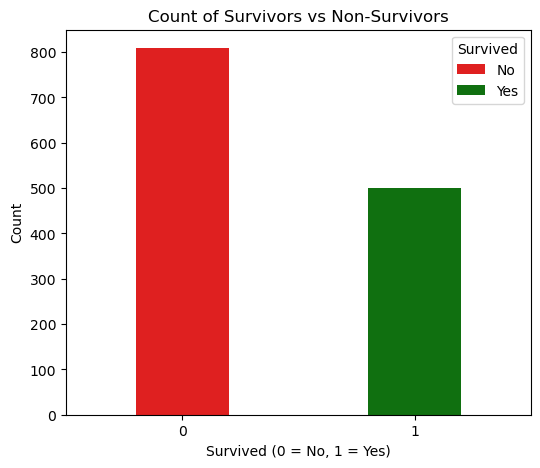

In [12]:
plt.figure(figsize=(6, 5))
sns.countplot(x="survived", data=df, palette=['red', 'green'],width=0.4, hue="survived")
plt.title('Count of Survivors vs Non-Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title="Survived", labels=['No', 'Yes'])
plt.show()

# sns.barplot(x=survived.index, y=survived.values, palette=['red', 'green'],width=0.4, hue=survived.index)
# with this the legend won't match with the palette, you'll have to create a manual legend which may be complex. 
#so, the best option is using countplot()

- **38.2%** of passengers survived while **61.80%** did not survive.

### alternative of the code

In [15]:
import pandas as pd

counts_per_class_table = pd.crosstab(df['pclass'], df['survived'])
counts_per_class_table.columns = ['Non-Survivors', 'Survived']  # Rename columns
print(counts_per_class_table)


        Non-Survivors  Survived
pclass                         
1                 123       200
2                 158       119
3                 528       181


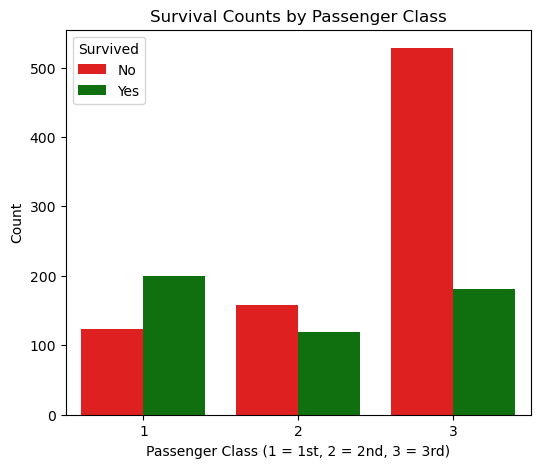

In [16]:
plt.figure(figsize=(6, 5))
sns.countplot(x='pclass', hue='survived', data=df, palette=['red', 'green'])

plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

 **PASSENGER CLASS 1**

- **61.92%** of passengers survived.

**PASSENGER CLASS 2**

- **42.96%** of passengers survived.

**PASSENGER CLASS 3**

- **25.53%** of passengers survived.

**OVERALL % DISTRIBUTION OF SURVIVORS AMONG THE 3 CLASSES**

- **40%** of survivors were from passenger class 1.

- **36.2%** of survivors were from passenger class 3.

- **23.8%** of survivors were from passenger class 2.

  **Question**

Why does 1st class have higher rate of survival while 3rd class has a lower rate of survival?




## ANALYZE AND VISUALIZE 'sex' COLUMN

In [19]:
gender= df['sex'].value_counts()
gender

sex
male      843
female    466
Name: count, dtype: int64

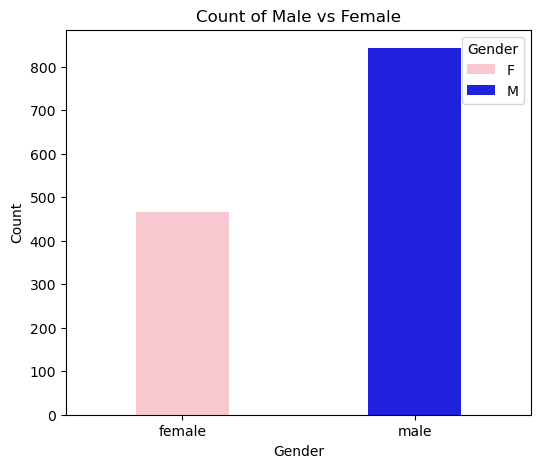

In [20]:
plt.figure(figsize=(6, 5))
sns.countplot(x="sex", data=df, palette=['pink', 'blue'],width=0.4, hue="sex")
plt.title('Count of Male vs Female')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title="Gender", labels=['F', 'M'])
plt.show()

- **64.40%** of passengers were male while **35.60%** were female.

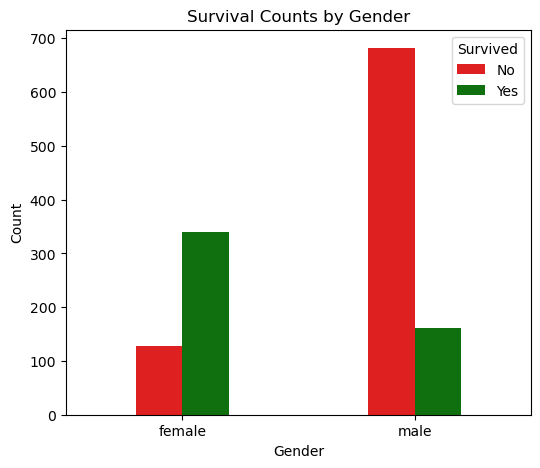

In [22]:
plt.figure(figsize=(6, 5))
sns.countplot(x='sex', hue='survived', data=df,width=0.4, palette=['red', 'green'])

plt.title('Survival Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

In [23]:
gender_survival_table= pd.crosstab(df['sex'],df['survived'])
gender_survival_table.columns=['survivors','non-survivors']
gender_survival_table

,survivors,non-survivors
sex,,
female,127,339
male,682,161


- **67.8%** of survivors were female.
- **32.2%** of survivors were male.

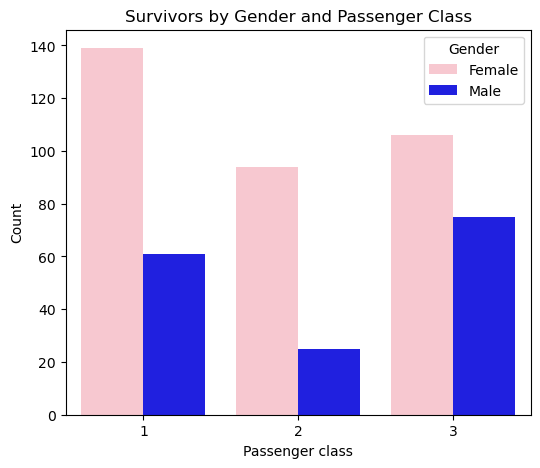

In [50]:
plt.figure(figsize=(6, 5))
sns.countplot(x='pclass', hue='sex', data=df[df['survived']==1], palette=['pink', 'blue'])

plt.title('Survivors by Gender and Passenger Class')
plt.xlabel('Passenger class')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.show()

In [121]:
df.groupby(['pclass','sex'])['survived'].sum().reset_index()


,pclass,sex,survived
0,1,female,139
1,1,male,61
2,2,female,94
3,2,male,25
4,3,female,106
5,3,male,75


- In each passenger class, majority of survivors were female.

- Among the 3 classes, 1st class had majority of survivors, followed by 3rd class then 2nd class. 

- **70%** of survivors in the 1st class were female.

- **70%** of survivors in the 2nd class were female.

- **59%** of survivors in the 3rd class were female.

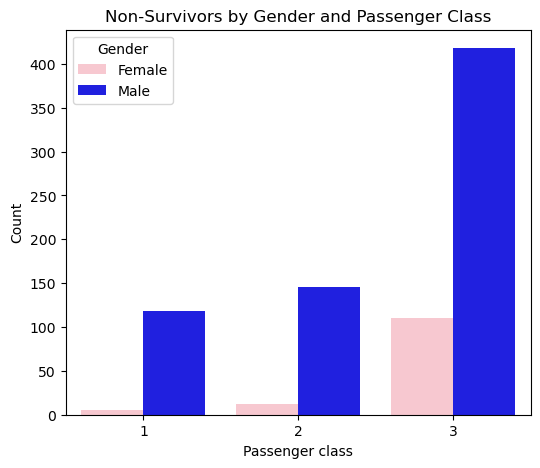

In [54]:
plt.figure(figsize=(6, 5))
sns.countplot(x='pclass', hue='sex', data=df[df['survived']==0], palette=['pink', 'blue'])

plt.title('Non-Survivors by Gender and Passenger Class')
plt.xlabel('Passenger class')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.show()

In [113]:
survivors= df[df['survived']==0]
survivors

non_survivors_per_class= pd.crosstab(survivors['pclass'],survivors['sex'])
non_survivors_per_class.columns=['female','male']
non_survivors_per_class

,female,male
pclass,,
1,5,118
2,12,146
3,110,418


- Only **4%** of non-survivors were female in the 1st class, **8%** in 2nd class and **20.83%** in 3rd class.
 

## ANALYZE AND VISUALIZE 'sibsp' COLUMN

In [176]:
# Count of each SibSp value
sibsp_counts = df['sibsp'].value_counts().sort_index()

# Percentage of each SibSp value
sibsp_percent = df['sibsp'].value_counts(normalize=True).sort_index() * 100

# Survival rate per SibSp value
sibsp_survival_rate = df.groupby('sibsp')['survived'].mean() * 100

# Combine into one DataFrame
sibsp_summary = pd.DataFrame({
    'count': sibsp_counts,
    'percentage': sibsp_percent,
    'survival_rate': sibsp_survival_rate
}).round(2)  # Round to 2 decimal places

print(sibsp_summary)


       count  percentage  survival_rate
sibsp                                  
0        891       68.07          34.68
1        319       24.37          51.10
2         42        3.21          45.24
3         20        1.53          30.00
4         22        1.68          13.64
5          6        0.46           0.00
8          9        0.69           0.00


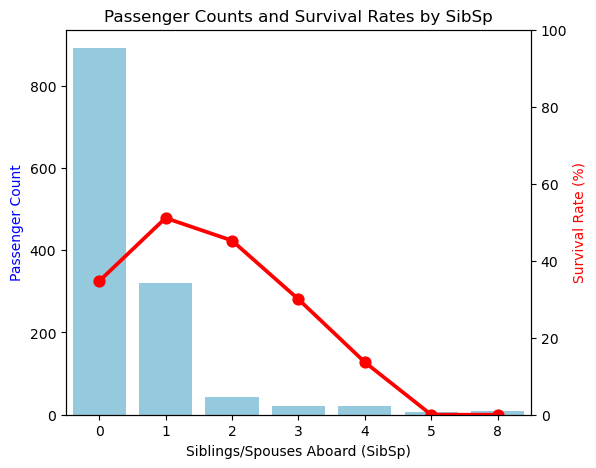

In [247]:
fig, ax1 = plt.subplots(figsize=(6,5))

# Passenger counts (left axis)
sns.barplot(x=sibsp_summary.index, y='count', data=sibsp_summary, color='skyblue', ax=ax1)
ax1.set_xlabel('Siblings/Spouses Aboard (SibSp)')
ax1.set_ylabel('Passenger Count', color='blue')

# Survival rate (right axis)
ax2 = ax1.twinx()
sns.pointplot(x=sibsp_summary.index, y='survival_rate', data=sibsp_summary, color='red', ax=ax2)
ax2.set_ylabel('Survival Rate (%)', color='red')
ax2.set_ylim(0, 100)

plt.title('Passenger Counts and Survival Rates by SibSp')
plt.show()


### Analysis of SibSp (Siblings/Spouses Aboard) and Survival

- Most passengers (68%) travelled without siblings/spouses (`sibsp = 0`).
- Passengers with 1 sibling/spouse had the **highest survival rate** (51%).
- Having 2 also gave relatively high survival (45%), but rates dropped sharply for larger family sizes.
- No passengers with `sibsp = 5` or `sibsp = 8` survived.
- Very large families had much lower survival rates, possibly due to difficulties escaping together.

This suggests that travelling with a small family group might have improved survival chances, while being alone or in a large group reduced the likelihood of survival.


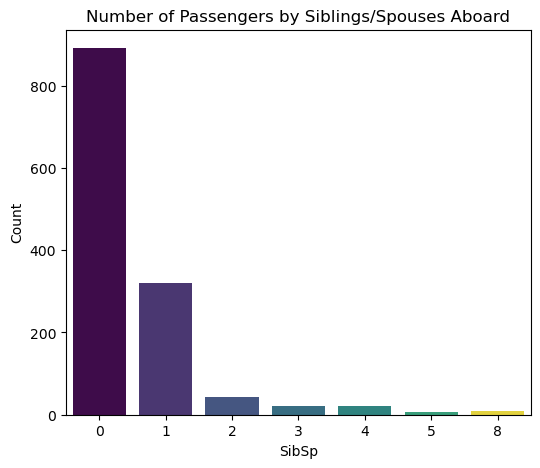

In [166]:
plt.figure(figsize=(6,5))
sns.countplot(x='sibsp', data=df, palette='viridis',hue='sibsp',legend=False)
plt.title('Number of Passengers by Siblings/Spouses Aboard')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

In [141]:
df['sibsp'].describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: sibsp, dtype: float64

## ANALYZE AND VISUALIZE 'parch' COLUMN


In [199]:
# Count of each parch value
parch_counts = df['parch'].value_counts().sort_index()

# Percentage of each parch value
parch_percent = df['parch'].value_counts(normalize=True).sort_index() * 100

# Survival rate per parch value
parch_survival_rate = df.groupby('parch')['survived'].mean() * 100

# Combine into one DataFrame
parch_summary = pd.DataFrame({
    'count': parch_counts,
    'percentage': parch_percent,
    'survival_rate': parch_survival_rate
}).round(2)  # Round to 2 decimal places

print(parch_summary)

       count  percentage  survival_rate
parch                                  
0       1002       76.55          33.53
1        170       12.99          58.82
2        113        8.63          50.44
3          8        0.61          62.50
4          6        0.46          16.67
5          6        0.46          16.67
6          2        0.15           0.00
9          2        0.15           0.00


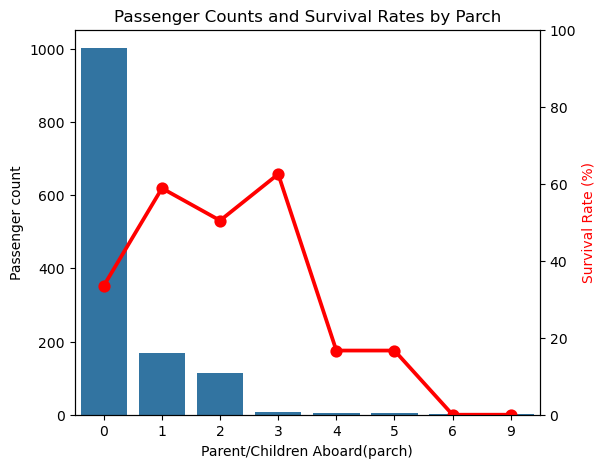

In [255]:
fig, ax1= plt.subplots(figsize=(6,5))

#passenger count
sns.barplot(x=parch_summary.index,y='count',data=parch_summary,ax=ax1)
ax1.set_xlabel('Parent/Children Aboard(parch)')
ax1.set_ylabel('Passenger count')

#survival rate
ax2 = ax1.twinx()
sns.pointplot(x=parch_summary.index, y='survival_rate', data=parch_summary, color='red', ax=ax2)
ax2.set_ylabel('Survival Rate (%)', color='red')
ax2.set_ylim(0, 100)

plt.title('Passenger Counts and Survival Rates by Parch')
plt.show()

In [281]:
embarked_count= df['embarked'].value_counts(normalize=True)*100
embarked_count

embarked
S    69.977082
C    20.626432
Q     9.396486
Name: proportion, dtype: float64